data/  HelloGithub.ipynb  LICENSE  matrix_one/  README.md


In [0]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score

In [18]:
df = pd.read_csv('data/men_shoes.csv')
df.shape

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (29) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(18280, 48)

In [19]:
df.head()

,id,asins,brand,categories,colors,count,dateadded,dateupdated,descriptions,dimension,ean,features,flavors,imageurls,isbn,keys,manufacturer,manufacturernumber,merchants,name,prices_amountmin,prices_amountmax,prices_availability,prices_color,prices_condition,prices_count,prices_currency,prices_dateadded,prices_dateseen,prices_flavor,prices_issale,prices_merchant,prices_offer,prices_returnpolicy,prices_shipping,prices_size,prices_source,prices_sourceurls,prices_warranty,quantities,reviews,sizes,skus,sourceurls,upc,vin,websiteids,weight
0,AVpfHrJ6ilAPnD_xVXOI,NaN,Josmo,"Clothing,Shoes,Men's Shoes,All Men's Shoes",NaN,NaN,2016-11-07T00:45:12Z,2016-11-07T00:45:12Z,"[{""dateSeen"":[""2016-11-07T00:45:12Z""],""sourceU...",NaN,6.993020e+11,"[{""key"":""Gender"",""value"":[""Men""]},{""key"":""Shoe...",NaN,https://i5.walmartimages.com/asr/13ac3d61-003c...,NaN,"josmo/8190wnavy75,699302044036,0699302044036",NaN,8190-W-NAVY-7.5,"[{""dateSeen"":[""2016-11-07T00:45:12Z""],""name"":""...","Josmo 8190 Plain Infant Walking Shoes, Navy - ...",39.89,39.89,NaN,NaN,NaN,NaN,USD,2016-11-07T00:45:12Z,2016-11-05T00:00:00Z,NaN,True,NaN,REDUCED USD 12.10,NaN,NaN,NaN,NaN,https://www.walmart.com/ip/Josmo-8190-Plain-In...,NaN,NaN,NaN,NaN,NaN,https://www.walmart.com/ip/Josmo-8190-Plain-In...,6.993020e+11,NaN,NaN,NaN
1,AVpfHrJ6ilAPnD_xVXOI,NaN,Josmo,"Clothing,Shoes,Men's Shoes,All Men's Shoes",NaN,NaN,2016-11-07T00:45:12Z,2016-11-07T00:45:12Z,"[{""dateSeen"":[""2016-11-07T00:45:12Z""],""sourceU...",NaN,6.993020e+11,"[{""key"":""Gender"",""value"":[""Men""]},{""key"":""Shoe...",NaN,https://i5.walmartimages.com/asr/13ac3d61-003c...,NaN,"josmo/8190wnavy75,699302044036,0699302044036",NaN,8190-W-NAVY-7.5,"[{""dateSeen"":[""2016-11-07T00:45:12Z""],""name"":""...","Josmo 8190 Plain Infant Walking Shoes, Navy - ...",51.99,51.99,NaN,NaN,new,NaN,USD,2016-11-07T00:45:12Z,2016-11-05T00:00:00Z,NaN,False,UnbeatableSale - Walmart.com,REDUCED USD 12.10,NaN,NaN,NaN,NaN,https://www.walmart.com/ip/Josmo-8190-Plain-In...,NaN,NaN,NaN,NaN,NaN,https://www.walmart.com/ip/Josmo-8190-Plain-In...,6.993020e+11,NaN,NaN,NaN
2,AVpfHsWP1cnluZ0-eVZ7,NaN,SERVUS BY HONEYWELL,"All Men's Shoes,Shoes,Men's Shoes,Clothing",NaN,NaN,2016-06-14T04:29:57Z,2016-07-09T20:26:48Z,"[{""dateSeen"":[""2016-07-09T20:26:48Z""],""sourceU...",NaN,NaN,"[{""key"":""Gender"",""value"":[""Men""]},{""key"":""Colo...",NaN,http://i5.walmartimages.com/dfw/dce07b8c-5844/...,NaN,servusbyhoneywell/zsr101blmlg,NaN,ZSR101BLMLG,"[{""dateSeen"":[""2016-06-14T04:29:57Z""],""name"":""...",Servus By Honeywell Shoe Studs Zsr101blmlg,40.02,40.02,NaN,NaN,new,NaN,USD,2016-06-14T04:29:57Z,2016-03-08T00:00:00Z,NaN,False,SIM Supply Inc - Walmart.com,NaN,NaN,NaN,NaN,NaN,http://www.walmart.com/ip/Studs-Shoe-Large-Pr-...,NaN,NaN,NaN,NaN,NaN,http://www.walmart.com/ip/Studs-Shoe-Large-Pr-...,NaN,NaN,NaN,NaN
3,AVpfHsWP1cnluZ0-eVZ7,NaN,SERVUS BY HONEYWELL,"All Men's Shoes,Shoes,Men's Shoes,Clothing",NaN,NaN,2016-06-14T04:29:57Z,2016-07-09T20:26:48Z,"[{""dateSeen"":[""2016-07-09T20:26:48Z""],""sourceU...",NaN,NaN,"[{""key"":""Gender"",""value"":[""Men""]},{""key"":""Colo...",NaN,http://i5.walmartimages.com/dfw/dce07b8c-5844/...,NaN,servusbyhoneywell/zsr101blmlg,NaN,ZSR101BLMLG,"[{""dateSeen"":[""2016-06-14T04:29:57Z""],""name"":""...",Servus By Honeywell Shoe Studs Zsr101blmlg,50.31,50.31,NaN,NaN,new,NaN,USD,2016-06-14T04:29:57Z,2015-11-30T00:00:00Z,NaN,False,SIM Supply Inc - Walmart.com,NaN,NaN,NaN,NaN,NaN,http://www.walmart.com/ip/Studs-Shoe-Large-Pr-...,NaN,NaN,NaN,NaN,NaN,http://www.walmart.com/ip/Studs-Shoe-Large-Pr-...,NaN,NaN,NaN,NaN
4,AVpfHsWP1cnluZ0-eVZ7,NaN,SERVUS BY HONEYWELL,"All Men's Shoes,Shoes,Men's Shoes,Clothing",NaN,NaN,2016-06-14T04:29:57Z,2016-07-09T20:26:48Z,"[{""dateSeen"":[""2016-07-09T20:26:48Z""],""sourceU...",NaN,NaN,"[{""key"":""Gender"",""value"":[""Men""]},{""key"":""Colo...",NaN,http://i5.walmartimages.com/dfw/dce07b8c-5844/...,NaN,servusbyhoneywell/zsr101blmlg,NaN,ZSR101BLMLG,"[{""dateSeen"":[""2016-06-14T04:29:5

In [20]:
df.columns

Index(['id', 'asins', 'brand', 'categories', 'colors', 'count', 'dateadded',
       'dateupdated', 'descriptions', 'dimension', 'ean', 'features',
       'flavors', 'imageurls', 'isbn', 'keys', 'manufacturer',
       'manufacturernumber', 'merchants', 'name', 'prices_amountmin',
       'prices_amountmax', 'prices_availability', 'prices_color',
       'prices_condition', 'prices_count', 'prices_currency',
       'prices_dateadded', 'prices_dateseen', 'prices_flavor', 'prices_issale',
       'prices_merchant', 'prices_offer', 'prices_returnpolicy',
       'prices_shipping', 'prices_size', 'prices_source', 'prices_sourceurls',
       'prices_warranty', 'quantities', 'reviews', 'sizes', 'skus',
       'sourceurls', 'upc', 'vin', 'websiteids', 'weight'],
      dtype='object')

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18280 entries, 0 to 18279
Data columns (total 48 columns):
id                     18280 non-null object
asins                  2161 non-null object
brand                  18263 non-null object
categories             18280 non-null object
colors                 10344 non-null object
count                  0 non-null float64
dateadded              18280 non-null object
dateupdated            18280 non-null object
descriptions           9704 non-null object
dimension              2968 non-null object
ean                    9690 non-null float64
features               13299 non-null object
flavors                0 non-null float64
imageurls              17255 non-null object
isbn                   0 non-null float64
keys                   18280 non-null object
manufacturer           6296 non-null object
manufacturernumber     14309 non-null object
merchants              13018 non-null object
name                   18280 non-null object
pric

In [24]:
mean_price = np.mean( df.prices_amountmin )
mean_price

93.53952188183217

In [0]:
[mean_price] * len(df)

In [0]:
y_true = df.prices_amountmin
y_pred = [mean_price] * len(y_true)
mean_absolute_error(y_true, y_pred)

63.968341227870624

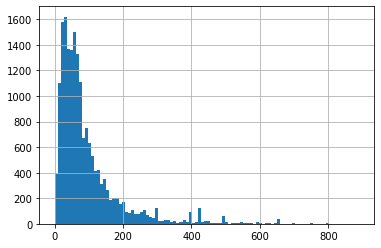

In [27]:
df.prices_amountmin.hist(bins=100);

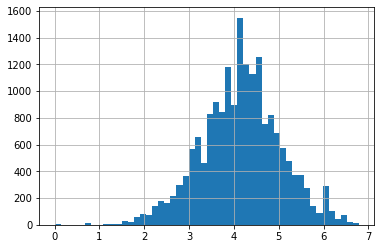

In [33]:
np.log( df.prices_amountmin + 1).hist(bins=50);

In [0]:
np.log1p

In [34]:
median_price = np.median( df.prices_amountmin )
median_price

64.95

In [35]:
y_true = df.prices_amountmin
y_pred = [median_price] * len(y_true)
mean_absolute_error(y_true, y_pred)

58.01120240700219

In [37]:
y_true = df.prices_amountmin
price_log_mean = np.exp( np.mean( np.log1p(y_true) ) ) - 1
y_pred = [price_log_mean] * len(y_true)
mean_absolute_error(y_true, y_pred)

58.03539547661041

In [39]:
df.columns

Index(['id', 'asins', 'brand', 'categories', 'colors', 'count', 'dateadded',
       'dateupdated', 'descriptions', 'dimension', 'ean', 'features',
       'flavors', 'imageurls', 'isbn', 'keys', 'manufacturer',
       'manufacturernumber', 'merchants', 'name', 'prices_amountmin',
       'prices_amountmax', 'prices_availability', 'prices_color',
       'prices_condition', 'prices_count', 'prices_currency',
       'prices_dateadded', 'prices_dateseen', 'prices_flavor', 'prices_issale',
       'prices_merchant', 'prices_offer', 'prices_returnpolicy',
       'prices_shipping', 'prices_size', 'prices_source', 'prices_sourceurls',
       'prices_warranty', 'quantities', 'reviews', 'sizes', 'skus',
       'sourceurls', 'upc', 'vin', 'websiteids', 'weight'],
      dtype='object')

In [43]:
df.brand.value_counts()

Nike                 1709
PUMA                  574
Ralph Lauren          524
New Balance           361
VANS                  356
                     ... 
Extreme Storm           1
LRG                     1
Character               1
Exposure Project        1
KeHE Distributors       1
Name: brand, Length: 1856, dtype: int64

In [0]:
df['brand_cat'] = df.brand.factorize()[0]  # przypisywanie liczb w miejsce kategorii

In [49]:
feats = ['brand_cat']
X = df[ feats ].values
y = df['prices_amountmin'].values

model = DecisionTreeRegressor(max_depth=5)

scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error')
np.mean(scores), np.std(scores)

(-58.38655694633361, 4.223555478221712)

In [0]:
def run_model(feats):
    X = df[ feats ].values
    y = df['prices_amountmin'].values

    model = DecisionTreeRegressor(max_depth=5)

    scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error')
    return np.mean(scores), np.std(scores)

In [51]:
run_model(['brand_cat'])

(-58.38655694633361, 4.223555478221712)

In [0]:
df['manufacturer_cat'] = df.manufacturer.factorize()[0]

In [55]:
print(f"""
{run_model(['manufacturer_cat'])}
{run_model(['manufacturer_cat', 'brand_cat'])}
""")


(-63.133649278023746, 3.394307434888982)
(-58.53930419908595, 4.311223231615437)



In [68]:
df[ df['brand'].str.lower().str.find('nike') == 0.0 ].brand.value_counts()

Nike                      1709
NIKE                        59
nike                         9
Nike Golf                    6
Nike Jordan Future Low       2
NIKE AIR JORDAN              1
NIKE AIR JORDAN I            1
NIKE - Kobe                  1
Nike Lunarglide 7            1
NIKE Air Jordan              1
Nike SB                      1
Nike Air Jordan              1
Name: brand, dtype: int64

In [0]:
df['is_nike'] = df['brand'].str.lower().str.find('nike')
df['is_nike'].fillna(-1, inplace=True)

In [80]:
print(f"""
{run_model(['manufacturer_cat'])}
{run_model(['manufacturer_cat', 'brand_cat'])}
{run_model(['manufacturer_cat', 'brand_cat', 'is_nike'])}
""")


(-63.133649278023746, 3.394307434888982)
(-58.539304199085976, 4.311223231615441)
(-58.76485044940459, 4.33425667811114)



In [81]:
!git status

On branch master
Your branch is up to date with 'origin/master'.

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git checkout -- <file>..." to discard changes in working directory)

	modified:   matrix_one/day3.ipynb

Untracked files:
  (use "git add <file>..." to include in what will be committed)

	matrix_one/day4.ipynb

no changes added to commit (use "git add" and/or "git commit -a")


In [0]:
!git add matrix_one/day3.ipynb

In [87]:
!git commit -m "Null models"

[master 8e33c07] Null models
 2 files changed, 2 insertions(+), 1 deletion(-)
 rewrite matrix_one/day3.ipynb (64%)
 create mode 100644 matrix_one/day4.ipynb


In [0]:
!git config --global user.email "kmwolowiec@gmail.com"
!git config --global user.name "Krzysiek"

In [88]:
!git push origin master

Counting objects: 5, done.
Delta compression using up to 2 threads.
Compressing objects: 100% (5/5), done.
Writing objects: 100% (5/5), 17.96 KiB | 2.57 MiB/s, done.
Total 5 (delta 2), reused 0 (delta 0)
remote: Resolving deltas: 100% (2/2), completed with 2 local objects.
To https://github.com/ThePearsSon/data_workshop.git
   ccba901..8e33c07  master -> master


In [89]:
!git status

On branch master
Your branch is up to date with 'origin/master'.

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git checkout -- <file>..." to discard changes in working directory)

	modified:   matrix_one/day4.ipynb

no changes added to commit (use "git add" and/or "git commit -a")


In [0]:
!git di